In [39]:
from time import time
from typing import List
import pandas as pd


def timeit(f):
    def count_time(*args, **kwargs) -> float:
        """
        Returns the difference between the end and start time in milliseconds
        """
        init_time = time()
        res_function = f(*args, **kwargs)
        final_time = time()
        
        return round((final_time - init_time)*1000, 5)
    return count_time

In [40]:
def fib_1(n: int) -> int:
    """
    Computational complexity: O(2^n)
    """
    if n in (1, 2):
        return 1
    return fib_1(n-1) + fib_1(n-2)

@timeit
def run_fib1(n: int) -> float:
    return fib_1(n)

In [41]:
def fib_2(n: int, dp_vector: List[int]) -> int:
    """
    Memoized solution;
    Computacional complexity: O(2n+1)
    """
    if (dp_vector[n]):
        return dp_vector[n]
    
    if n in (1, 2):
        response = 1
    else:
        response = fib_2(n-1, dp_vector) + fib_2(n-2, dp_vector)
    
    dp_vector[n] = response
    return response

@timeit
def run_fib2(n: int) -> float:
    dp_vector = [0]*(n+1)
    return fib_2(n, dp_vector)

In [42]:
def fib_3(n: int) -> int:
    """
    Bottom-Up Approach
    Computacional complexity: O(n)
    """
    if n in (1, 2):
        return 1
    
    bottom_up: List[int] = [0]*(n+1)
    bottom_up[1] = 1
    bottom_up[2] = 1
    
    for i in range(3, n+1):
        bottom_up[i] = bottom_up[i-1] + bottom_up[i-2]
    
    return bottom_up[n]

@timeit
def run_fib3(n: int) -> float:
    return fib_3(n)

In [43]:
# COMPARING ALL THESE METHODS:
def compare_all_methods(N: int) -> pd.DataFrame:
    times_methods = {
        "input": [],
        "time_fib_1": [],
        "time_fib_2": [],
        "time_fib_3": []
    }

    for i in range(1, N):
        times_methods["input"].append(i)

        times_methods["time_fib_1"].append(run_fib1(i))
        times_methods["time_fib_2"].append(run_fib2(i))
        times_methods["time_fib_3"].append(run_fib3(i))

    df = pd.DataFrame(times_methods)
    return df

In [52]:
df = compare_all_methods(N = 40)
df.tail()

,input,time_fib_1,time_fib_2,time_fib_3
34,35,1002.09618,0.01240,0.00691
35,36,1585.20222,0.02646,0.00644
36,37,2566.00690,0.01168,0.00668
37,38,4232.38182,0.01168,0.00668
38,39,7015.83910,0.01359,0.00834


In [54]:
"Get columns comparing time difference between each pair of methods"
df["fib2-fib3"] = df["time_fib_2"] - df["time_fib_3"]
df["fib1-fib2"] = df["time_fib_1"] - df["time_fib_2"]
df["fib1-fib3"] = df["time_fib_1"] - df["time_fib_3"]

df.tail()

,input,time_fib_1,time_fib_2,time_fib_3,fib2-fib3,fib1-fib2,fib1-fib3
34,35,1002.09618,0.01240,0.00691,0.00549,1002.08378,1002.08927
35,36,1585.20222,0.02646,0.00644,0.02002,1585.17576,1585.19578
36,37,2566.00690,0.01168,0.00668,0.00500,2565.99522,2566.00022
37,38,4232.38182,0.01168,0.00668,0.00500,4232.37014,4232.37514
38,39,7015.83910,0.01359,0.00834,0.00525,7015.82551,7015.83076


In [61]:
df["fib2-fib3"].describe()

count    39.000000
mean      0.003454
std       0.004416
min      -0.000480
25%       0.001190
50%       0.001670
75%       0.004290
max       0.020510
Name: fib2-fib3, dtype: float64

In [83]:
# COMPARING METHODS 2 AND 3
def compare_methods_2_3(N: int) -> pd.DataFrame:
    times_methods = {
        "input": [],
        "time_fib_2": [],
        "time_fib_3": []
    }

    for i in range(1, N):
        times_methods["input"].append(i)

        times_methods["time_fib_2"].append(run_fib2(i))
        times_methods["time_fib_3"].append(run_fib3(i))

    df = pd.DataFrame(times_methods)
    df["fib2-fib3"] = df["time_fib_2"] - df["time_fib_3"]
    return df

In [84]:
df2 = compare_methods_2_3(1000)
df2.tail()

,input,time_fib_2,time_fib_3,fib2-fib3
994,995,0.19813,0.08321,0.11492
995,996,0.20003,0.08225,0.11778
996,997,0.19908,0.08154,0.11754
997,998,0.19979,0.08178,0.11801
998,999,0.19908,0.08202,0.11706


In [85]:
df2["fib2-fib3"].describe()

count    999.000000
mean       0.060653
std        0.042644
min       -0.154490
25%        0.032785
50%        0.058170
75%        0.088335
max        0.558620
Name: fib2-fib3, dtype: float64

In [86]:
df2.loc[df2["time_fib_2"].idxmax(), :]

input         172.00000
time_fib_2      0.58818
time_fib_3      0.02956
fib2-fib3       0.55862
Name: 171, dtype: float64

<AxesSubplot:ylabel='Frequency'>

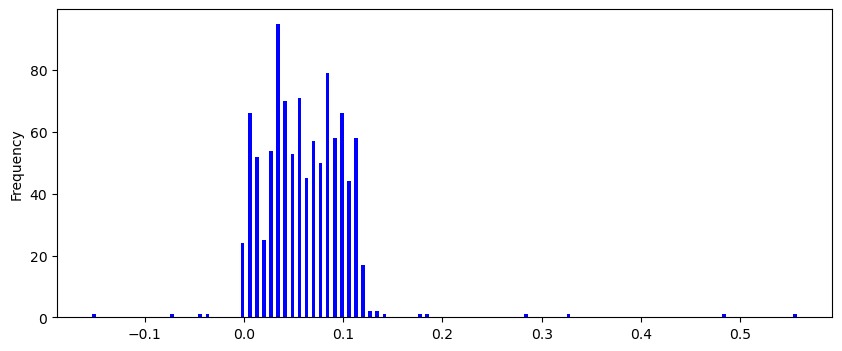

In [96]:
df2["fib2-fib3"].plot(
    kind="hist", bins=100, grid=False, figsize=(10,4), color='blue', zorder=2, rwidth=0.5
)

<AxesSubplot:xlabel='time_fib_3', ylabel='time_fib_2'>

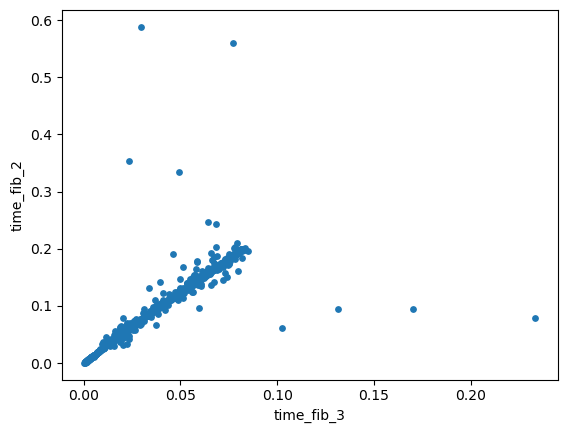

In [106]:
df2.plot.scatter(x='time_fib_3', y='time_fib_2', s = 15)